In [1]:
import pandas as pd
df_res = pd.read_csv("data.csv", header=None)
import pickle
images = pickle.loads(df_res.loc[0,1])
index = pickle.loads(df_res.loc[0,2])
actions = pickle.loads(df_res.loc[0,3])
actions_new = pickle.loads(df_res.loc[0,4])

In [2]:
sub_action = actions_new[actions_new[:,0] == 0, :]
sub_image = images[:,:,actions_new[:,0] == 0]

In [3]:
def f(x): return x >30 and x < 60 and x%4 != 0 #x % 3 == 0 or x % 5 == 0
ind = filter(f, range(80))
def g(x): return x%2 != 0 #x % 3 == 0 or x % 5 == 0
ind_w = filter(g, range(80))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

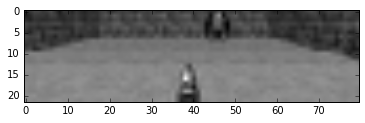

In [5]:
plt.imshow(images[ind,:,239], cmap='gray')

In [6]:
cropped_tmp = images[ind,:,:]
cropped = cropped_tmp[:,ind_w,:]
# plt.imshow(cropped[:,ind_w], cmap='gray')
cropped_tmp.shape

(22, 80, 3509)

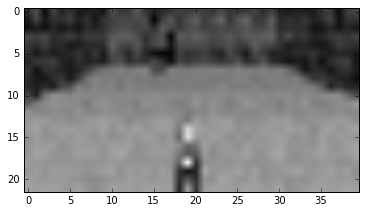

In [7]:
plt.imshow(cropped[:,:,1000], cmap='gray')

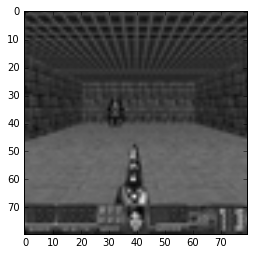

In [49]:
plt.imshow(images[:,:,1000], cmap='gray')

In [8]:
y = sub_action
sub_action.nonzero()[0][0]

0

In [9]:
y_target = np.zeros(y.shape[0])
for i in range(y_target.shape[0]):
    y_target[i]= sub_action[i].nonzero()[0][0]

In [10]:
y_target.shape

(1596,)

In [11]:
X = sub_image
cropped_tmp = X[ind,:,:]
cropped = cropped_tmp[:,ind_w,:]

x_turned =cropped.transpose(2,0,1).reshape(y_target.shape[0],-1)
# x_turned = np.rot90(np.flip(np.swapaxes(np.swapaxes(cropped, 2,0), 0,1),1),k=3)

In [12]:
x_turned.shape

(1596, 880)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

kfold = StratifiedKFold(n_splits= 5, shuffle= True)

clf = LogisticRegressionCV()

cv = kfold.split(x_turned, y_target)

scores = cross_val_score(clf, x_turned, y_target, scoring='accuracy', cv=cv)

print ('StratifiedKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

StratifiedKFold score: 0.964 ± 0.013


In [ ]:
sub_action.sum(axis = 0)

In [ ]:
y_target

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_turned, y_target )

In [26]:
LR = LogisticRegression(multi_class='ovr')

In [27]:
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
np.sum(LR.predict(x_test) == y_test)

387

In [29]:
%env THEANO_FLAGS=device=cpu,floatX=float32

env: THEANO_FLAGS=device=cpu,floatX=float32


In [30]:
import gym
import ppaquette_gym_doom
import matplotlib.pyplot as plt
from gym.wrappers import SkipWrapper
from ppaquette_gym_doom.wrappers.action_space import ToDiscrete


%matplotlib inline
GAME_NAME = 'ppaquette/DoomBasic-v0'

env = ToDiscrete('minimal')(gym.make(GAME_NAME))



INFO:gym.envs.registration:Making new env: ppaquette/DoomBasic-v0
[2017-03-21 04:19:06,847] Making new env: ppaquette/DoomBasic-v0


In [ ]:
def_state = env.reset()

def_state_80_rg = np.array(toimage(def_state).resize((80,80), Image.ANTIALIAS).convert('L'))

ds80_1 = def_state_80_rg[ind,:]
ds80_2 = ds80_1[:,ind_w]
LR.predict(ds80_2.reshape(1,-1))
new_state = def_state

In [ ]:
processed_state = np.array(toimage(new_state).resize((80,80), Image.ANTIALIAS).convert('L'))
processed_state = processed_state[ind,:]
processed_state = processed_state[:,ind_w]
processed_state = processed_state.reshape(1,-1)
action = LR.predict(processed_state)[0]
print action
new_state = env.step(int(action))[0]

In [ ]:
plt.imshow(new_state)

In [ ]:
def_state = env.reset()

In [47]:
episodes = 50
#     index = np.empty([1, 1])
import time
from scipy.misc import toimage
from PIL import Image


print("")
rewards = []
time_val = []
for i in range(episodes):

    start_time = time.time()
    
    print("episode #", i)
    def_state = env.reset()
    is_done = False
    
    def_state_80_rg = np.array(toimage(def_state).resize((80,80), Image.ANTIALIAS).convert('L'))

    ds80_1 = def_state_80_rg[ind,:]
    ds80_2 = ds80_1[:,ind_w]
    action = LR.predict(ds80_2.reshape(1,-1))
    tot_rew = 0
    
    st_num = 0
#     game.new_episode()
    while not is_done:

        st_num += 1
        new_env = env.step(int(action))
        new_state = new_env[0]
        is_done = new_env[2]
        
        r = new_env[1]
        
        processed_state = np.array(toimage(new_state).resize((80,80), Image.ANTIALIAS).convert('L'))
        processed_state = processed_state[ind,:]
        processed_state = processed_state[:,ind_w]
        processed_state = processed_state.reshape(1,-1)
        action = LR.predict(processed_state)[0]
        
        tot_rew += r

        

#         game.advance_action()
#         a = game.get_last_action()
#         r = game.get_last_reward()
        
#         if (s.number % frame_sk == 0):
#             im_ar = np.array(toimage(img).resize((80,80), Image.ANTIALIAS).convert('L'))
#             images = np.dstack((images, im_ar))
#             actions = np.append(actions, np.atleast_2d(a), axis=0)
#             rew_step.append(r)
            
            
            
        
#         imgs.append(img)
#         actions.append(a)

#         print("state #", st_num)
#         #print("game variables: ", misc)
#         print("action:", action)
#         print("reward:",r)
#         print("=====================")

    ep_time = time.time() - start_time
#     print("episode finished!")
#     print("total reward: {}, time:{}".format(tot_rew,ep_time))
    
    rewards.append(tot_rew)
    time_val.append(ep_time)
#     print("************************")




('episode #', 0)
('episode #', 1)
('episode #', 2)
('episode #', 3)
('episode #', 4)
('episode #', 5)
('episode #', 6)
('episode #', 7)
('episode #', 8)
('episode #', 9)
('episode #', 10)
('episode #', 11)
('episode #', 12)
('episode #', 13)
('episode #', 14)
('episode #', 15)
('episode #', 16)
('episode #', 17)
('episode #', 18)
('episode #', 19)
('episode #', 20)
('episode #', 21)
('episode #', 22)
('episode #', 23)
('episode #', 24)
('episode #', 25)
('episode #', 26)
('episode #', 27)
('episode #', 28)
('episode #', 29)
('episode #', 30)
('episode #', 31)
('episode #', 32)
('episode #', 33)
('episode #', 34)
('episode #', 35)
('episode #', 36)
('episode #', 37)
('episode #', 38)
('episode #', 39)
('episode #', 40)
('episode #', 41)
('episode #', 42)
('episode #', 43)
('episode #', 44)
('episode #', 45)
('episode #', 46)
('episode #', 47)
('episode #', 48)
('episode #', 49)


In [48]:
print np.mean(rewards)
np.mean(ep_time)

68.72


0.28031706809997559

In [ ]:
env.step(1)

In [ ]:
st = env.step(2)[0]

In [ ]:
plt.imshow(st)